In [6]:
# Data manipulation, visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [7]:
stat = pd.read_excel('Telco_customer_churn_status.xlsx')
demo = pd.read_excel('Telco_customer_churn_demographics.xlsx')
serv = pd.read_excel('Telco_customer_churn_services.xlsx')

key = ['Customer ID']
df = stat.merge(  
    demo, left_on=key, right_on=key).merge(
    serv, left_on=key, right_on=key)
df.head()

,Customer ID,Count_x,Quarter_x,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [8]:
to_drop = [  # Drop columns not used in the analyses
    'Customer ID',
    'Count_x',
    'Quarter_x',
    'Customer Status',
    'Churn Value',
    'Churn Score',
    'Churn Category',
    'Churn Reason',
    'Count_y',
    'Age',
    'Number of Dependents',
    'Quarter_y',
    'Referred a Friend',
    'Number of Referrals',
    'Phone Service',
    'Internet Service',
    'Streaming Music',
    'Total Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue']
df.drop(to_drop, axis=1, inplace=True)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Satisfaction Score                 7043 non-null   int64  
 1   Churn Label                        7043 non-null   object 
 2   CLTV                               7043 non-null   int64  
 3   Gender                             7043 non-null   object 
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Count                              7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

In [10]:
df.isna().sum()  # Check for missing values


Satisfaction Score                      0
Churn Label                             0
CLTV                                    0
Gender                                  0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Count                                   0
Tenure in Months                        0
Offer                                3877
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Unlimited Data                          0
Contract                                0
Paperless Billing                 

In [11]:
df.duplicated().sum()  # Check for duplicated data


0

In [12]:
df.describe()

,Satisfaction Score,CLTV,Count,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge
count,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,4400.295755,1.0,32.386767,22.958954,20.515405,64.761692
std,1.201657,1183.057152,0.0,24.542061,15.448113,20.418940,30.090047
min,1.000000,2003.000000,1.0,1.000000,0.000000,0.000000,18.250000
25%,3.000000,3469.000000,1.0,9.000000,9.210000,3.000000,35.500000
50%,3.000000,4527.000000,1.0,29.000000,22.890000,17.000000,70.350000
75%,4.000000,5380.500000,1.0,55.000000,36.395000,27.000000,89.850000
max,5.000000,6500.000000,1.0,72.000000,49.990000,85.000000,118.750000


In [13]:
df.describe(include='O')

,Churn Label,Gender,Under 30,Senior Citizen,Married,Dependents,Offer,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Unlimited Data,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,3166,7043,5517,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,5,2,3,2,2,2,2,2,2,2,3,2,3
top,No,Male,No,No,No,No,Offer B,No,Fiber Optic,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,5174,3555,5642,5901,3641,5416,824,4072,3035,5024,4614,4621,4999,4336,4311,4745,3610,4171,3909


In [14]:
df.head()

,Satisfaction Score,Churn Label,CLTV,Gender,Under 30,Senior Citizen,Married,Dependents,Count,Tenure in Months,...,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge
0,3,Yes,5433,Male,No,Yes,No,No,1,1,...,No,Yes,No,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65
1,3,Yes,5302,Female,No,Yes,Yes,Yes,1,8,...,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65
2,2,Yes,3179,Male,No,Yes,No,Yes,1,18,...,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45
3,2,Yes,5337,Female,No,Yes,Yes,Yes,1,25,...,Yes,Yes,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50
4,2,Yes,2793,Female,No,Yes,Yes,Yes,1,37,...,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50


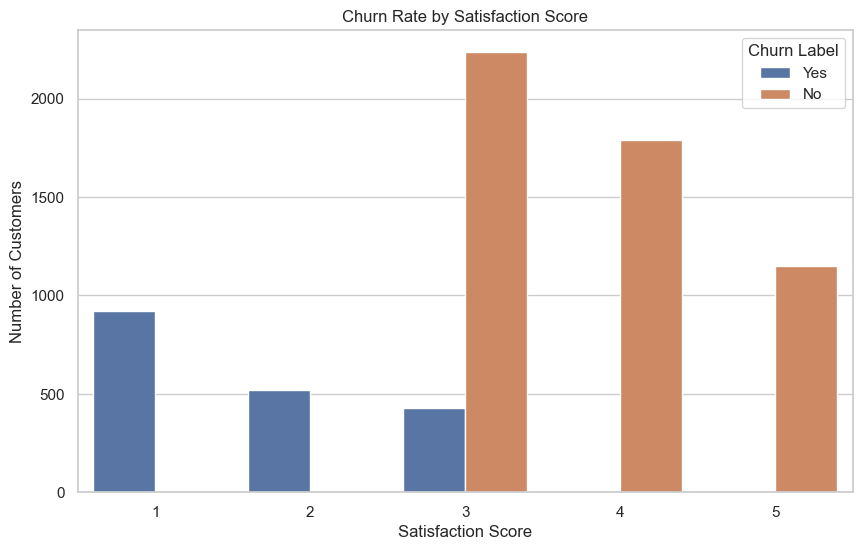

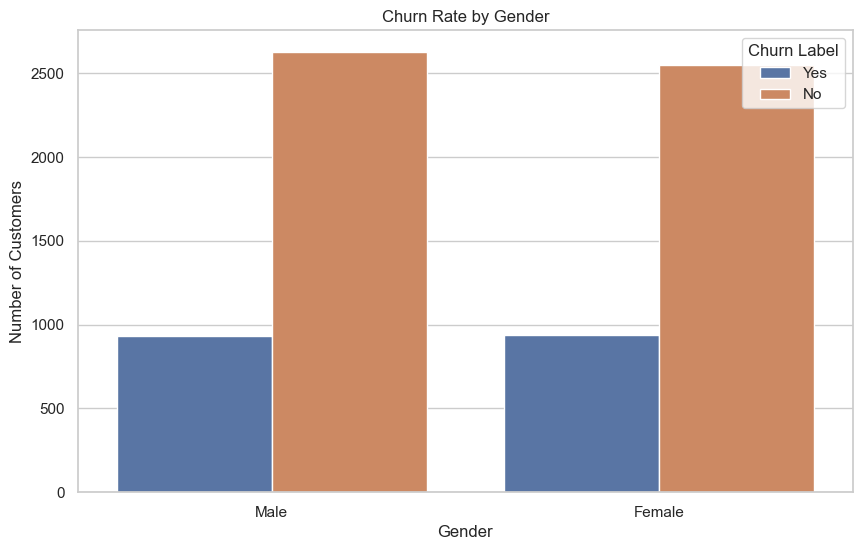

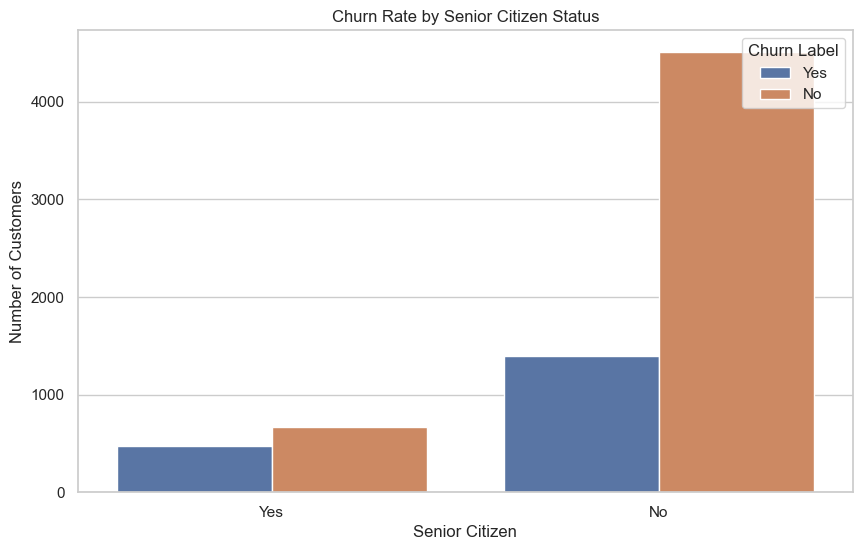

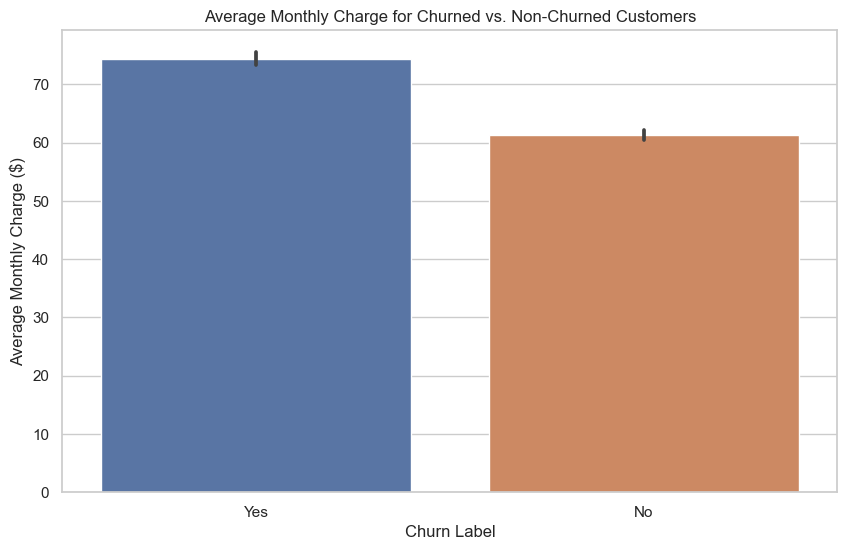

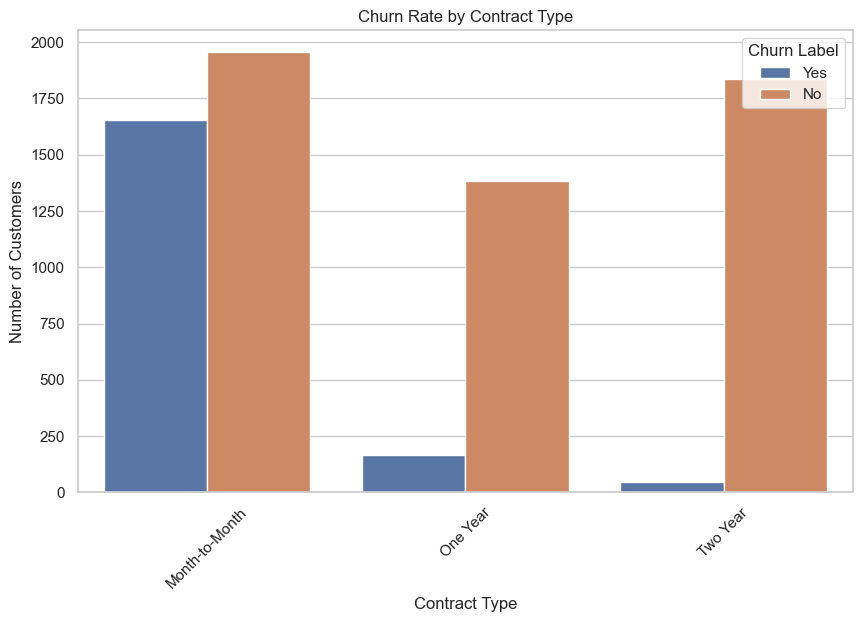

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your merged DataFrame
# Replace 'df' with the variable name of your merged DataFrame if it's different

# Basic Configuration
sns.set(style="whitegrid")  # Set seaborn style for the plots

# Churn Rate by Satisfaction Score
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction Score', hue='Churn Label', data=df)
plt.title('Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()

# Churn Rate by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Churn Label', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()

# Churn Rate by Senior Citizen Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Senior Citizen', hue='Churn Label', data=df)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.show()

# Average Monthly Charge for Churned vs. Non-Churned Customers
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn Label', y='Monthly Charge', data=df)
plt.title('Average Monthly Charge for Churned vs. Non-Churned Customers')
plt.xlabel('Churn Label')
plt.ylabel('Average Monthly Charge ($)')
plt.show()

# Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Label', loc='upper right')
plt.xticks(rotation=45)
plt.show()


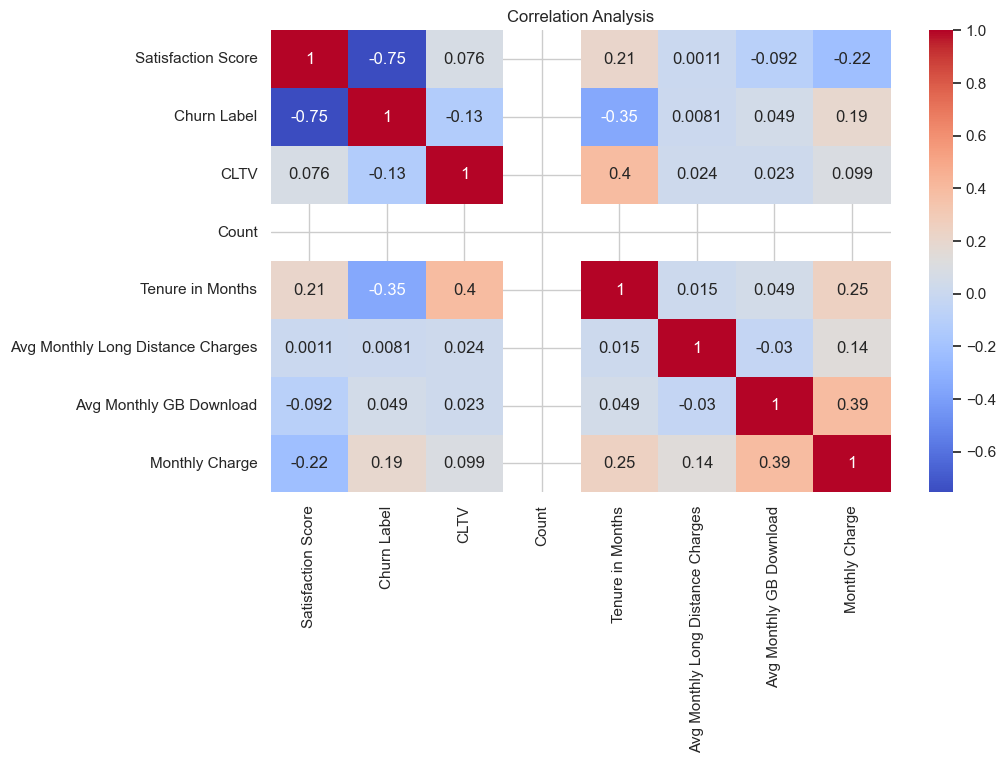

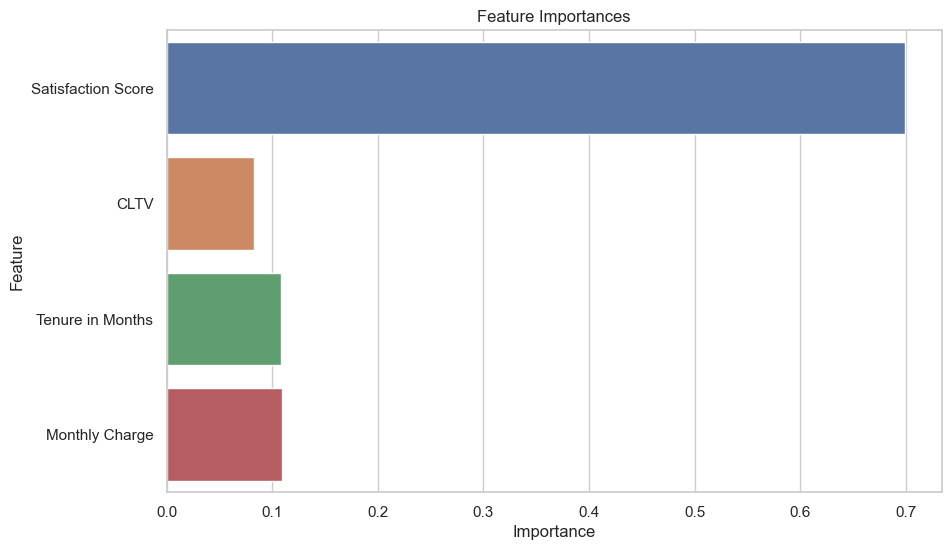

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1009
           1       0.96      0.82      0.89       400

    accuracy                           0.94      1409
   macro avg       0.95      0.90      0.92      1409
weighted avg       0.94      0.94      0.94      1409

[[996  13]
 [ 71 329]]
Chi-Squared Test: p-value = 0.0


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from scipy.stats import chi2_contingency


# Convert Churn Label to binary
df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Correlation Analysis
plt.figure(figsize=(10, 6))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

# Preparing data for machine learning model
X = df[['Satisfaction Score', 'CLTV', 'Tenure in Months', 'Monthly Charge']]  # Example features
y = df['Churn Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Forest for feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Model Evaluation
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Chi-Squared Test for Categorical Variables
# Example: Churn by Contract Type
contingency_table = pd.crosstab(df['Churn Label'], df['Contract'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Test: p-value = {p}")
